<a href="https://colab.research.google.com/github/vipulagr890/Image-classification/blob/master/cats_and_dogs_augmented_classififcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
import os

In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [ ]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract = True)

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
os.listdir(base_dir)

['vectorize.py', 'validation', 'train']

In [ ]:
train_dir = os.path.join(base_dir, 'train')
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [ ]:

validation_dir = os.path.join(base_dir, 'validation')
os.listdir(validation_dir)

['dogs', 'cats']

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir  = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cats_imgs = len(os.listdir(train_cats_dir))
train_dogs_imgs = len(os.listdir(train_dogs_dir))

val_cats_imgs = len(os.listdir(val_cats_dir))
val_dogs_imgs = len(os.listdir(val_dogs_dir))

total_train = train_cats_imgs + train_dogs_imgs
total_val = val_cats_imgs + val_dogs_imgs

In [ ]:
print('total training cat images:', train_cats_imgs)
print('total training dog images:', train_dogs_imgs)

print('total validation cat images:', val_cats_imgs)
print('total validation dog images:', val_dogs_imgs)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 100
IMG_SHAPE = 150


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode = 'binary')

Found 2000 images belonging to 2 classes.


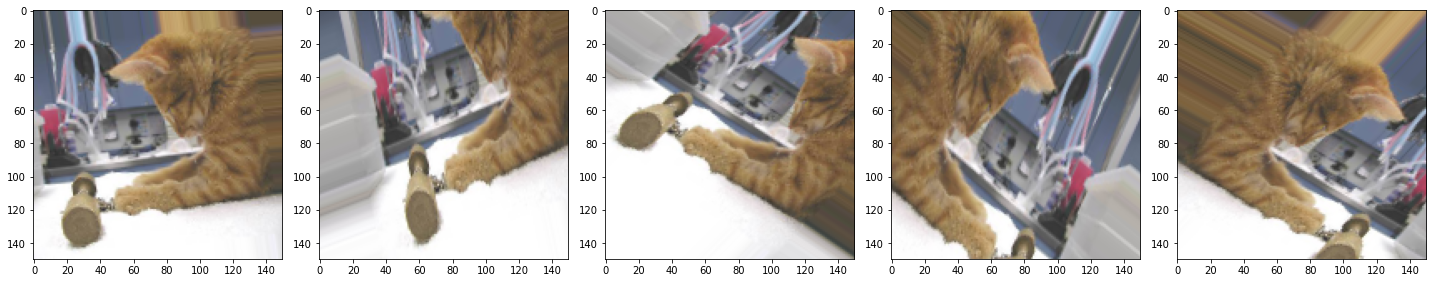

In [ ]:
augmented_images = [train_data_gen[0][0][5] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/100
20/20 [==============================] - 15s 771ms/step - loss: 0.7034 - accuracy: 0.5240 - val_loss: 0.6861 - val_accuracy: 0.5070
Epoch 2/100
20/20 [==============================] - 16s 789ms/step - loss: 0.6890 - accuracy: 0.5425 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 16s 780ms/step - loss: 0.6873 - accuracy: 0.5380 - val_loss: 0.6775 - val_accuracy: 0.6000
Epoch 4/100
20/20 [==============================] - 16s 780ms/step - loss: 0.6766 - accuracy: 0.5385 - val_loss: 0.6647 - val_accuracy: 0.5620
Epoch 5/100
20/20 [==============================] - 16s 781ms/step - loss: 0.6570 - accuracy: 0.5915 - val_loss: 0.6737 - val_accuracy: 0.5770
Epoch 6/100
20/20 [==============================] - 16s 781ms/step - loss: 0.6562 - accuracy: 0.6155 - val_loss: 0.6400 - val_accuracy: 0.6710
Epoch 7/100
20/20 [==============================] - 16s 789ms/step - loss: 0.6402 - accuracy: 0.6470 - val_loss: 0.6620 - val_accuracy: